<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/FRUIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/FRUIT/

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab_Notebooks/FRUIT/'
/content


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/FRUIT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 808 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/FRUIT/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 808 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Avacado-Bo': 0,
 'Banana-Chuoi': 1,
 'Kiwi': 2,
 'Limes-Chanh': 3,
 'Mango-Xoai': 4,
 'Passion fruit-Chanh day': 5,
 'Peach-Dao': 6,
 'Pineapple-Thom': 7,
 'Pomegranate-Luu': 8,
 'Watermelon-Dua hau': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation_set.class_indices

{'Avacado-Bo': 0,
 'Banana-Chuoi': 1,
 'Kiwi': 2,
 'Limes-Chanh': 3,
 'Mango-Xoai': 4,
 'Passion fruit-Chanh day': 5,
 'Peach-Dao': 6,
 'Pineapple-Thom': 7,
 'Pomegranate-Luu': 8,
 'Watermelon-Dua hau': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=120,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/120
26/26 [==============================] - 1161s 46s/step - loss: 3.7684 - accuracy: 0.2475 - val_loss: 1.4431 - val_accuracy: 0.5000
Epoch 2/120
26/26 [==============================] - 15s 572ms/step - loss: 1.2147 - accuracy: 0.5718 - val_loss: 0.7663 - val_accuracy: 0.7809
Epoch 3/120
26/26 [==============================] - 15s 570ms/step - loss: 0.7272 - accuracy: 0.7673 - val_loss: 0.4939 - val_accuracy: 0.8478
Epoch 4/120
26/26 [==============================] - 15s 565ms/step - loss: 0.6687 - accuracy: 0.7735 - val_loss: 0.3339 - val_accuracy: 0.9035
Epoch 5/120
26/26 [==============================] - 15s 570ms/step - loss: 0.4921 - accuracy: 0.8564 - val_loss: 0.4803 - val_accuracy: 0.8230
Epoch 6/120
26/26 [==============================] - 15s 571ms/step - loss: 0.4734 - accuracy: 0.8465 - val_loss: 0.2345 - val_accuracy: 0.9220
Epoch 7/120
26/26 [==============================] - 15s 569ms/step - loss: 0.3148 - accuracy: 0.8960 - val_loss: 0.1672 - val_accuracy:

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.002806884702295065
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

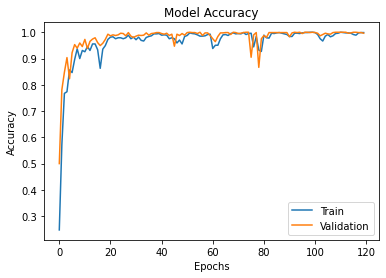

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("FruitT.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('FruitT.h5')

1/1 [==============================] - 0s 344ms/step
CHUOI


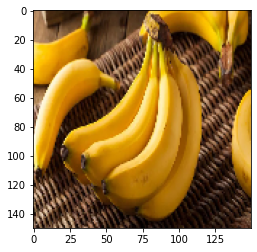

1/1 [==============================] - 0s 16ms/step
CHUOI


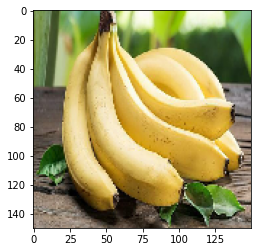

1/1 [==============================] - 0s 16ms/step
CHUOI


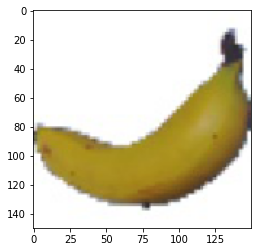

1/1 [==============================] - 0s 19ms/step
CHUOI


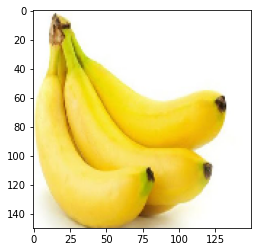

1/1 [==============================] - 0s 15ms/step
CHUOI


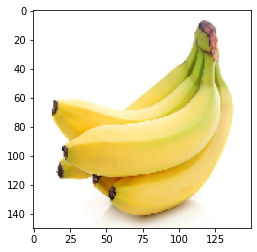

1/1 [==============================] - 0s 16ms/step
CHUOI


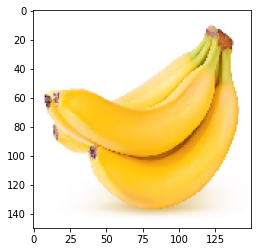

1/1 [==============================] - 0s 16ms/step
BO


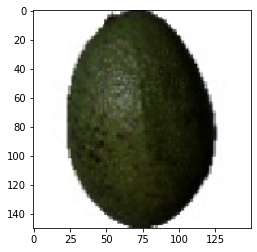

1/1 [==============================] - 0s 18ms/step
BO


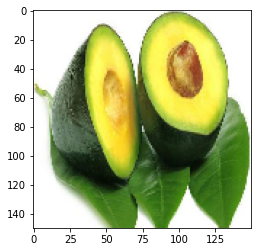

1/1 [==============================] - 0s 17ms/step
KIWI


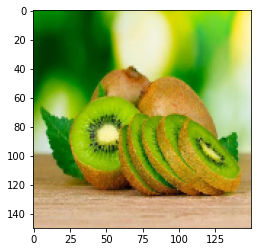

1/1 [==============================] - 0s 15ms/step
KIWI


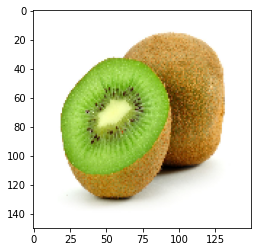

1/1 [==============================] - 0s 18ms/step
KIWI


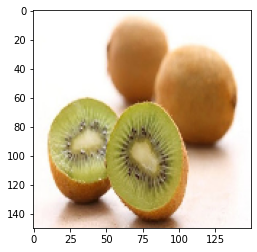

1/1 [==============================] - 0s 15ms/step
KIWI


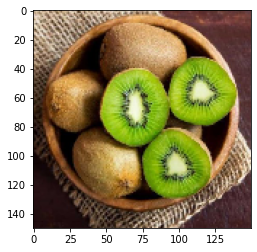

1/1 [==============================] - 0s 18ms/step
KIWI


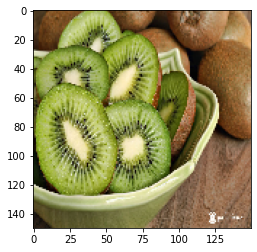

1/1 [==============================] - 0s 15ms/step
KIWI


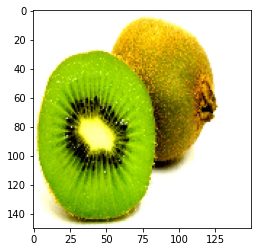

1/1 [==============================] - 0s 17ms/step
BO


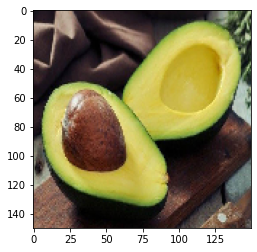

1/1 [==============================] - 0s 22ms/step
BO


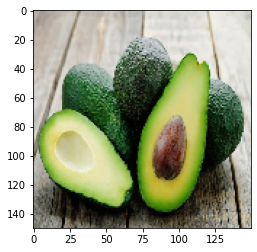

1/1 [==============================] - 0s 18ms/step
BO


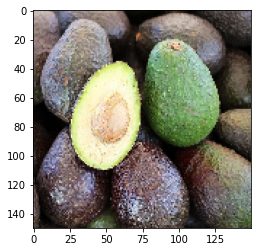

1/1 [==============================] - 0s 16ms/step
BO


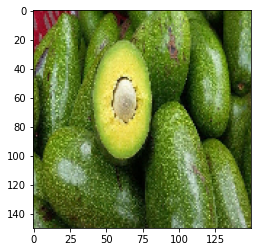

1/1 [==============================] - 0s 16ms/step
XOAI


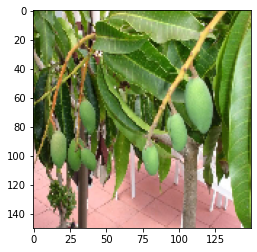

1/1 [==============================] - 0s 16ms/step
XOAI


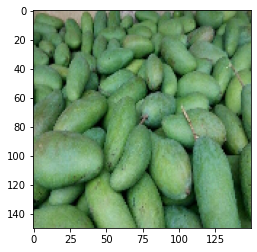

1/1 [==============================] - 0s 15ms/step
XOAI


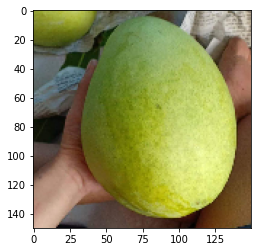

1/1 [==============================] - 0s 21ms/step
CHANH


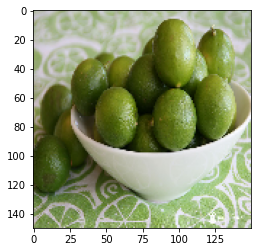

1/1 [==============================] - 0s 16ms/step
CHANH


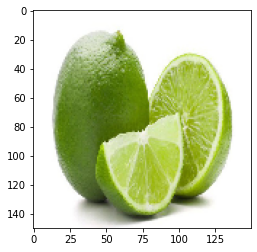

1/1 [==============================] - 0s 16ms/step
CHANH


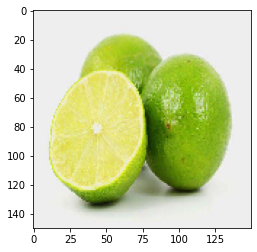

1/1 [==============================] - 0s 17ms/step
CHANH


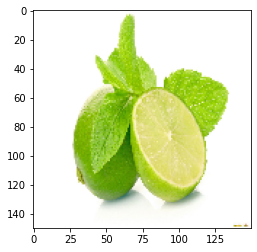

1/1 [==============================] - 0s 16ms/step
XOAI


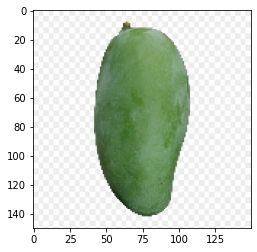

1/1 [==============================] - 0s 19ms/step
XOAI


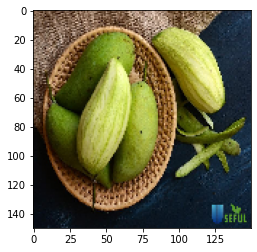

1/1 [==============================] - 0s 17ms/step
XOAI


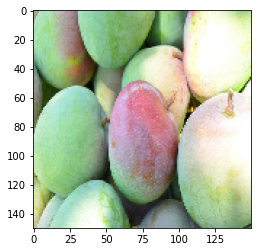

1/1 [==============================] - 0s 21ms/step
CHANH


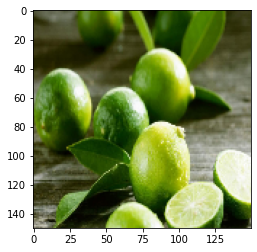

1/1 [==============================] - 0s 18ms/step
CHANH DAY


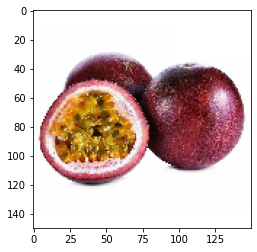

1/1 [==============================] - 0s 20ms/step
CHANH DAY


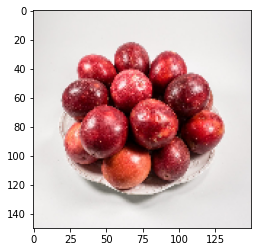

1/1 [==============================] - 0s 16ms/step
CHANH DAY


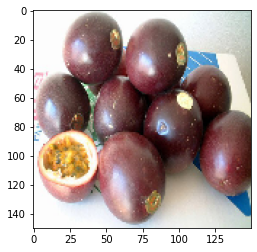

1/1 [==============================] - 0s 23ms/step
CHANH DAY


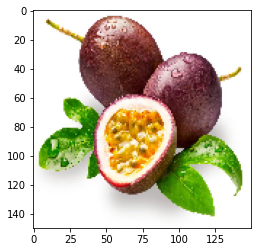

1/1 [==============================] - 0s 16ms/step
CHANH DAY


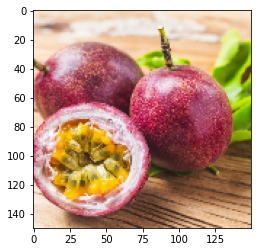

1/1 [==============================] - 0s 19ms/step
CHANH


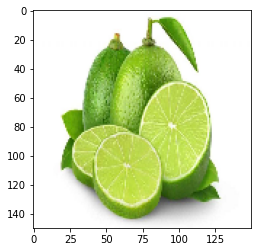

1/1 [==============================] - 0s 16ms/step
CHANH DAY


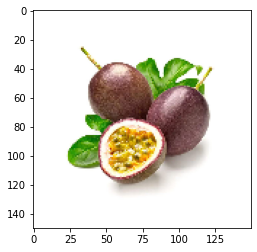

1/1 [==============================] - 0s 18ms/step
DAO


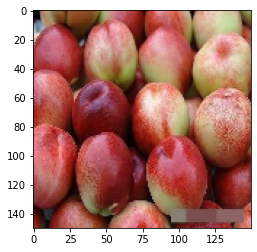

1/1 [==============================] - 0s 21ms/step
DAO


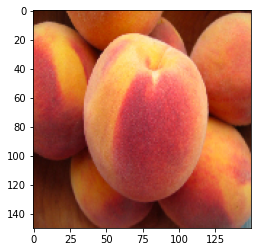

1/1 [==============================] - 0s 16ms/step
DAO


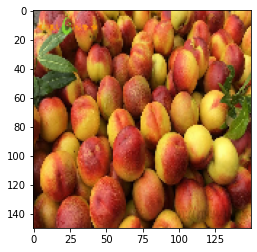

1/1 [==============================] - 0s 17ms/step
DAO


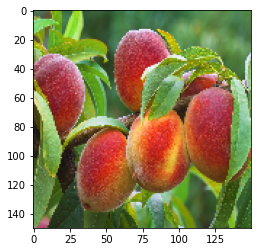

1/1 [==============================] - 0s 21ms/step
DAO


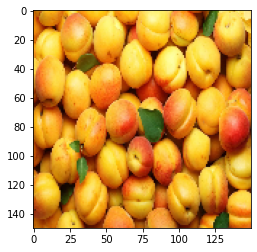

1/1 [==============================] - 0s 16ms/step
DAO


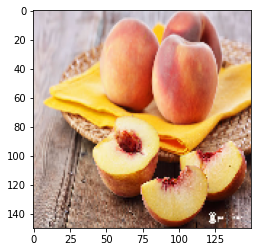

In [ ]:
test="/content/drive/MyDrive/Colab_Notebooks/FRUIT/TEST"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BO'
  if round(result[0][1])==1:
    prediction='CHUOI'
  if round(result[0][2])==1:
    prediction='KIWI'
  if round(result[0][3])==1:
    prediction='CHANH'
  if round(result[0][4])==1:
    prediction='XOAI'
  if round(result[0][5])==1:
    prediction='CHANH DAY'
  if round(result[0][6])==1:
    prediction='DAO'
  if round(result[0][7])==1:
    prediction='THOM'
  if round(result[0][8])==1:
    prediction='LUU'
  if round(result[0][9])==1:
    prediction='DUA HAU'
  print(prediction)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
